# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by 
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us 
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# 1. Import Libraries and load dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix as cm
import graphviz as graph
import sklearn.tree as tree
from IPython.display import Image, display

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma 
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What 
information is available about the data.

# 2. Print 10 samples from the dataset

In [2]:
diabetic_data = pd.read_csv('pima-indians-diabetes.csv')
diabetic_data.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# 3. Print the datatypes of each column and the shape of the dataset

In [3]:
diabetic_data.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values 
cannot be 0. look at column by column logically to understand this.

# 4. Replace all the 0s in the column with the median of the same column value accordingly.

In [4]:
diabetic_data.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [5]:
for col in diabetic_data.columns[:len(diabetic_data.columns)-1]:
    print(col)
    print('No of rows with value as zero: {}'.format(len(diabetic_data[diabetic_data[col]==0])))

Preg
No of rows with value as zero: 111
Plas
No of rows with value as zero: 5
Pres
No of rows with value as zero: 35
skin
No of rows with value as zero: 227
test
No of rows with value as zero: 374
mass
No of rows with value as zero: 11
pedi
No of rows with value as zero: 0
age
No of rows with value as zero: 0


`We cannot have zeros for the columns plasma, pres, skin and mass so let's impute them with median values`

In [6]:
columns_with_zero_values = ['Plas', 'Pres', 'skin', 'mass', 'test']
for col in columns_with_zero_values:
    diabetic_data[col] = np.where(diabetic_data[col]==0, diabetic_data[col].median(), diabetic_data[col])
    
for col in columns_with_zero_values:
    print(col)
    print('No of rows with value as zero: {}'.format(len(diabetic_data[diabetic_data[col]==0])))

Plas
No of rows with value as zero: 0
Pres
No of rows with value as zero: 0
skin
No of rows with value as zero: 0
mass
No of rows with value as zero: 0
test
No of rows with value as zero: 0


# 5. Print the descriptive statistics of each & every column using describe() function

In [7]:
diabetic_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# 6. See the distribution of 'Class' variable and plot it using appropriate graph

<AxesSubplot:xlabel='class', ylabel='count'>

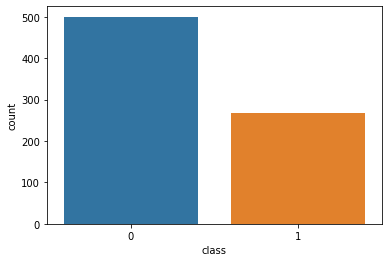

In [8]:
sns.countplot(diabetic_data['class'])

In [11]:
diabetic_data.groupby('class').agg({'class': 'count'})

,class
class,
0,500
1,268


# 7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

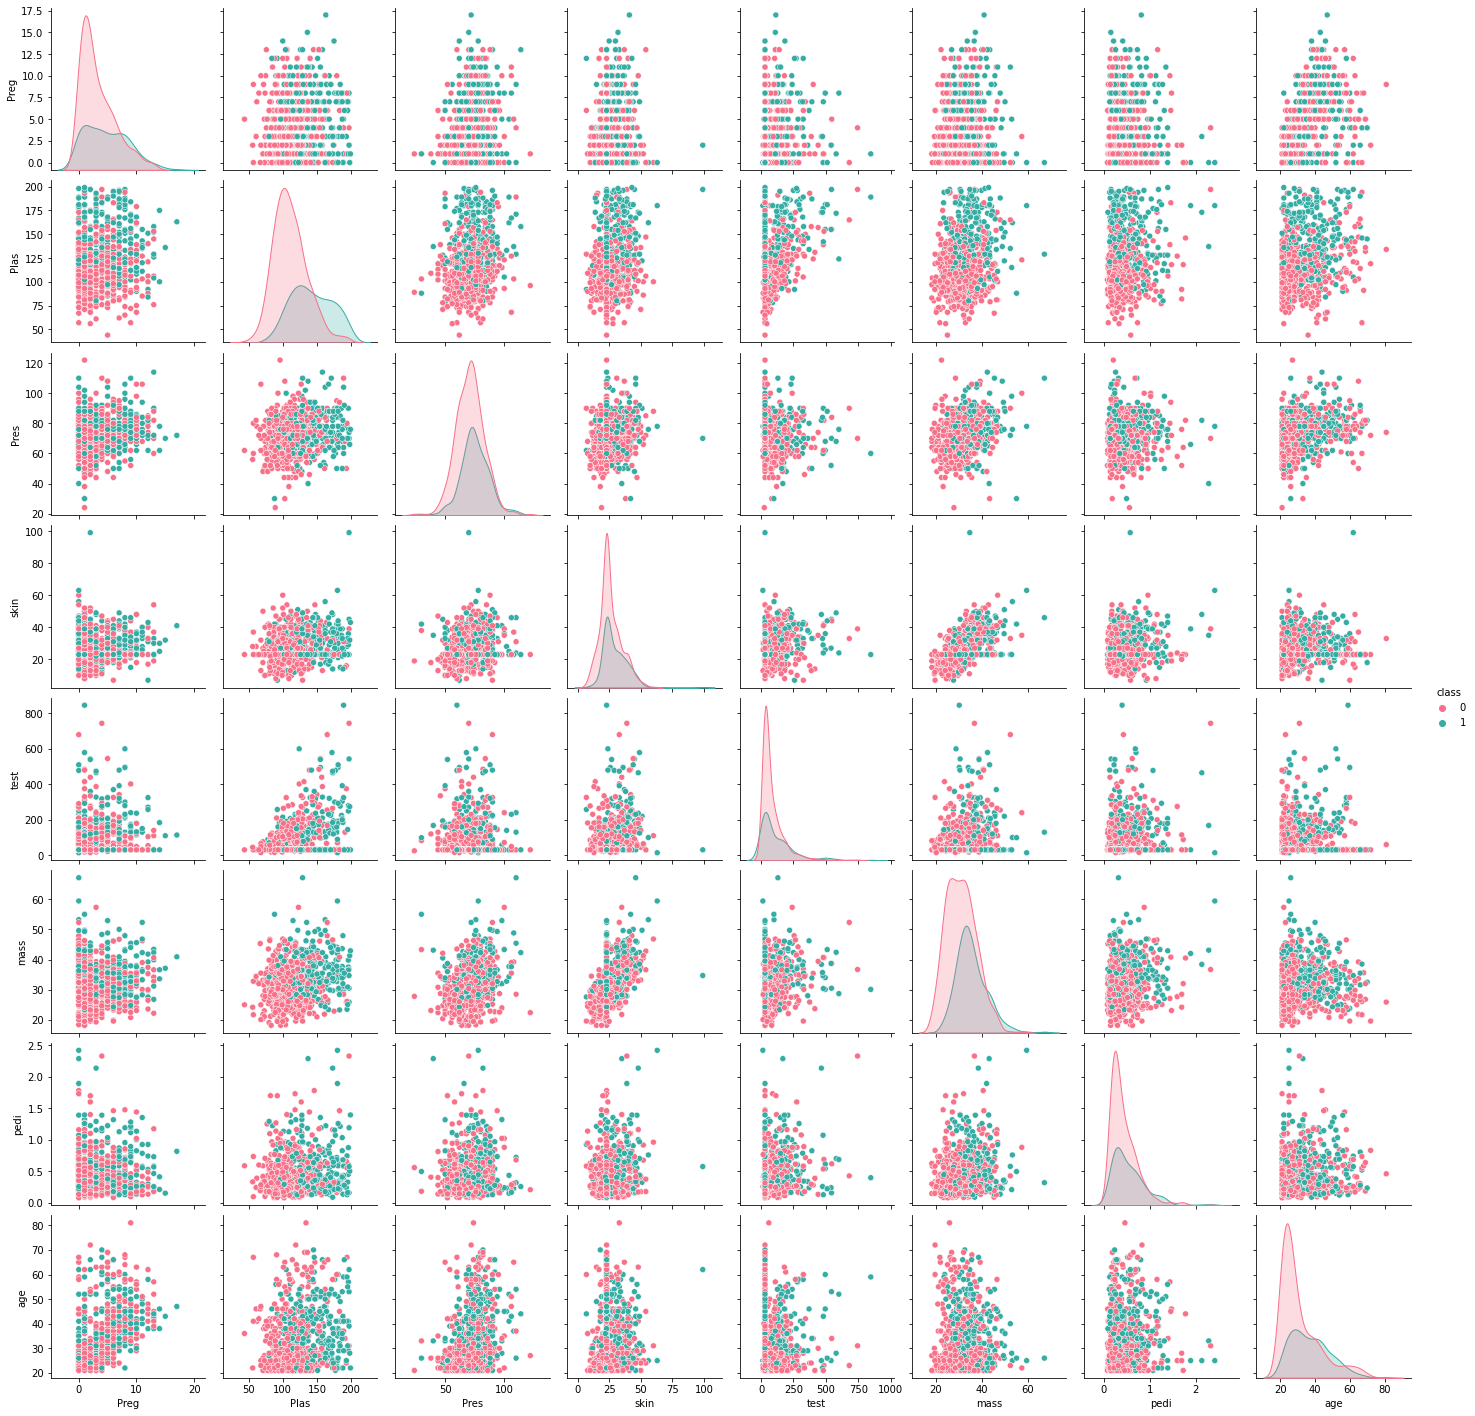

In [15]:
sns.pairplot(diabetic_data, hue='class', palette="husl")

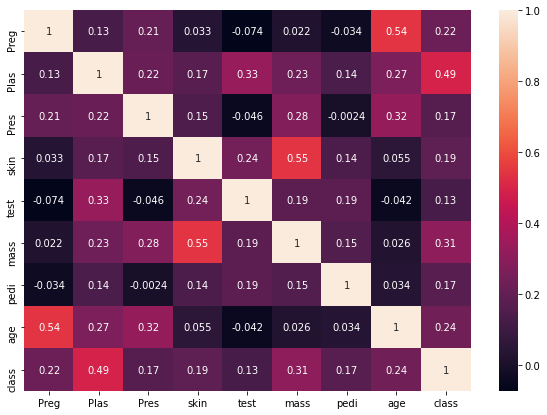

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(diabetic_data.corr(), annot=True)
plt.show()

Check for correlation between variables whose values are >0.8

`There is not much co relation between the variables`

# 8. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).

In [21]:
X = diabetic_data.drop('class', axis=1)
y = diabetic_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 9. Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [22]:
dTree = DecisionTreeClassifier(criterion='entropy', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

# 10. Print the accuracy of the model & print the confusion matrix

In [23]:
y_predict = dTree.predict(X_test)
cm(y_test, y_predict)

array([[112,  34],
       [ 29,  56]])

In [24]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.7272727272727273


In [27]:
prima_tree = open('prima_tree.dot', 'w')
prima_dot_data = tree.export_graphviz(dTree, out_file=prima_tree, class_names=['Diabetic', 'Non-Diabetic'], feature_names=X_train.columns)
prima_tree.close()

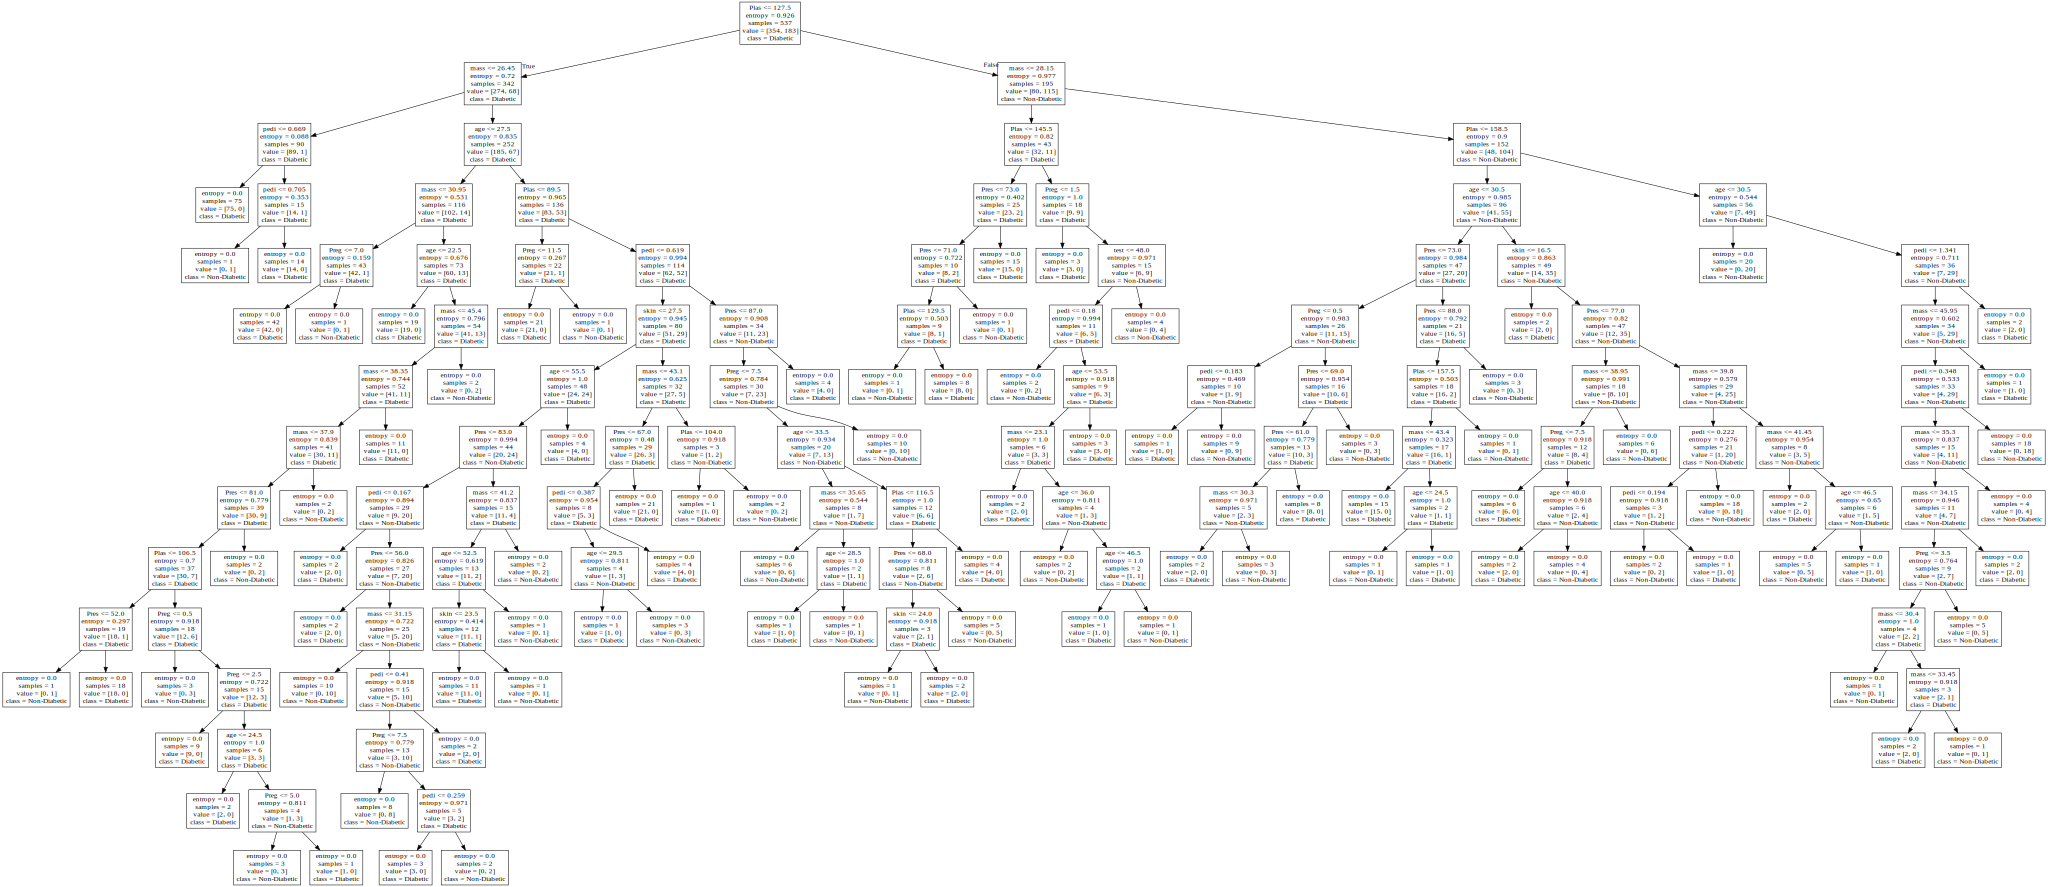

In [29]:
with open('prima_tree.dot') as f:
    dot_data = f.read()
display(graph.Source(dot_data))